In [35]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Preparation
### 1.1 Load the Dataset

In [36]:
data = pd.read_csv('house_price_prediction_dataset.csv')

In [37]:
# Display the first few rows
data.head()

,PropertyID,Location,PropertyType,SizeInSqFt,Bedrooms,Bathrooms,YearBuilt,GarageSpaces,LotSize,NearbySchools,MarketTrend,SellingPrice
0,1,Downtown,Condo,1217.0,2.0,1.0,1959,0,2273.0,4,1,391780.0
1,2,Beachfront,Single Family,2385.0,5.0,3.0,2006,1,1631.0,5,1,1195998.0
2,3,Suburbs,Single Family,2405.0,6.0,3.0,1986,3,3800.0,1,1,736928.0
3,4,Suburbs,Single Family,1790.0,2.0,2.0,2013,1,4347.0,7,1,528240.0
4,5,Downtown,Single Family,2563.0,5.0,2.0,1989,3,3320.0,7,1,958097.0


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PropertyID     1500 non-null   int64  
 1   Location       1500 non-null   object 
 2   PropertyType   1500 non-null   object 
 3   SizeInSqFt     1425 non-null   float64
 4   Bedrooms       1425 non-null   float64
 5   Bathrooms      1425 non-null   float64
 6   YearBuilt      1500 non-null   int64  
 7   GarageSpaces   1500 non-null   int64  
 8   LotSize        1425 non-null   float64
 9   NearbySchools  1500 non-null   int64  
 10  MarketTrend    1500 non-null   int64  
 11  SellingPrice   1500 non-null   float64
dtypes: float64(5), int64(5), object(2)
memory usage: 140.8+ KB


In [39]:
data.describe()

,PropertyID,SizeInSqFt,Bedrooms,Bathrooms,YearBuilt,GarageSpaces,LotSize,NearbySchools,MarketTrend,SellingPrice
count,1500.000000,1425.000000,1425.000000,1425.000000,1500.00000,1500.000000,1425.000000,1500.000000,1500.000000,1.500000e+03
mean,750.500000,1610.717895,3.082807,1.687719,1985.91800,1.085333,4127.230175,5.695333,-0.003333,5.112892e+05
std,433.157015,664.183550,1.675633,0.782550,20.88149,0.929495,2314.593053,2.288377,0.759632,2.393133e+05
min,1.000000,500.000000,1.000000,1.000000,1950.00000,0.000000,1000.000000,1.000000,-1.000000,1.217560e+05
25%,375.750000,995.000000,1.000000,1.000000,1968.00000,0.000000,2181.000000,4.000000,-1.000000,3.075755e+05
50%,750.500000,1639.000000,3.000000,2.000000,1986.00000,1.000000,3949.000000,6.000000,0.000000,4.583810e+05
75%,1125.250000,2199.000000,4.000000,2.000000,2004.00000,2.000000,5603.000000,7.000000,1.000000,7.017140e+05
max,1500.000000,3060.000000,6.000000,4.000000,2022.00000,3.000000,10458.000000,10.000000,1.000000,1.416213e+06


### Remove irrelevant features

In [40]:
data.drop("PropertyID", axis=1, inplace=True)

### 1.2 Handle Missing Values
Numerical Features: Impute with median (robust to outliers).

In [41]:
# Check for missing values
data.isnull().mean()*100

Location         0.0
PropertyType     0.0
SizeInSqFt       5.0
Bedrooms         5.0
Bathrooms        5.0
YearBuilt        0.0
GarageSpaces     0.0
LotSize          5.0
NearbySchools    0.0
MarketTrend      0.0
SellingPrice     0.0
dtype: float64

In [42]:
# Impute missing values with the median for numerical columns
data['SizeInSqFt'] = data['SizeInSqFt'].fillna(data['SizeInSqFt'].median())
data['Bedrooms'] = data['Bedrooms'].fillna(data['Bedrooms'].median())
data['Bathrooms'] = data['Bathrooms'].fillna(data['Bathrooms'].median())
data['LotSize'] = data['LotSize'].fillna(data['LotSize'].median())

In [43]:
# Check for missing values
data.isnull().mean()*100

Location         0.0
PropertyType     0.0
SizeInSqFt       0.0
Bedrooms         0.0
Bathrooms        0.0
YearBuilt        0.0
GarageSpaces     0.0
LotSize          0.0
NearbySchools    0.0
MarketTrend      0.0
SellingPrice     0.0
dtype: float64

### 1.3 Encode Categorical Variables
Convert categorical variables into numerical formats.

In [44]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

encoder = LabelEncoder()
data["Location"] = encoder.fit_transform(data["Location"])
data["PropertyType"] = encoder.fit_transform(data["PropertyType"])

In [45]:
data.head()

,Location,PropertyType,SizeInSqFt,Bedrooms,Bathrooms,YearBuilt,GarageSpaces,LotSize,NearbySchools,MarketTrend,SellingPrice
0,2,0,1217.0,2.0,1.0,1959,0,2273.0,4,1,391780.0
1,0,1,2385.0,5.0,3.0,2006,1,1631.0,5,1,1195998.0
2,3,1,2405.0,6.0,3.0,1986,3,3800.0,1,1,736928.0
3,3,1,1790.0,2.0,2.0,2013,1,4347.0,7,1,528240.0
4,2,1,2563.0,5.0,2.0,1989,3,3320.0,7,1,958097.0


### 1.4 Feature Scaling
Scale numerical features to standardize their range.

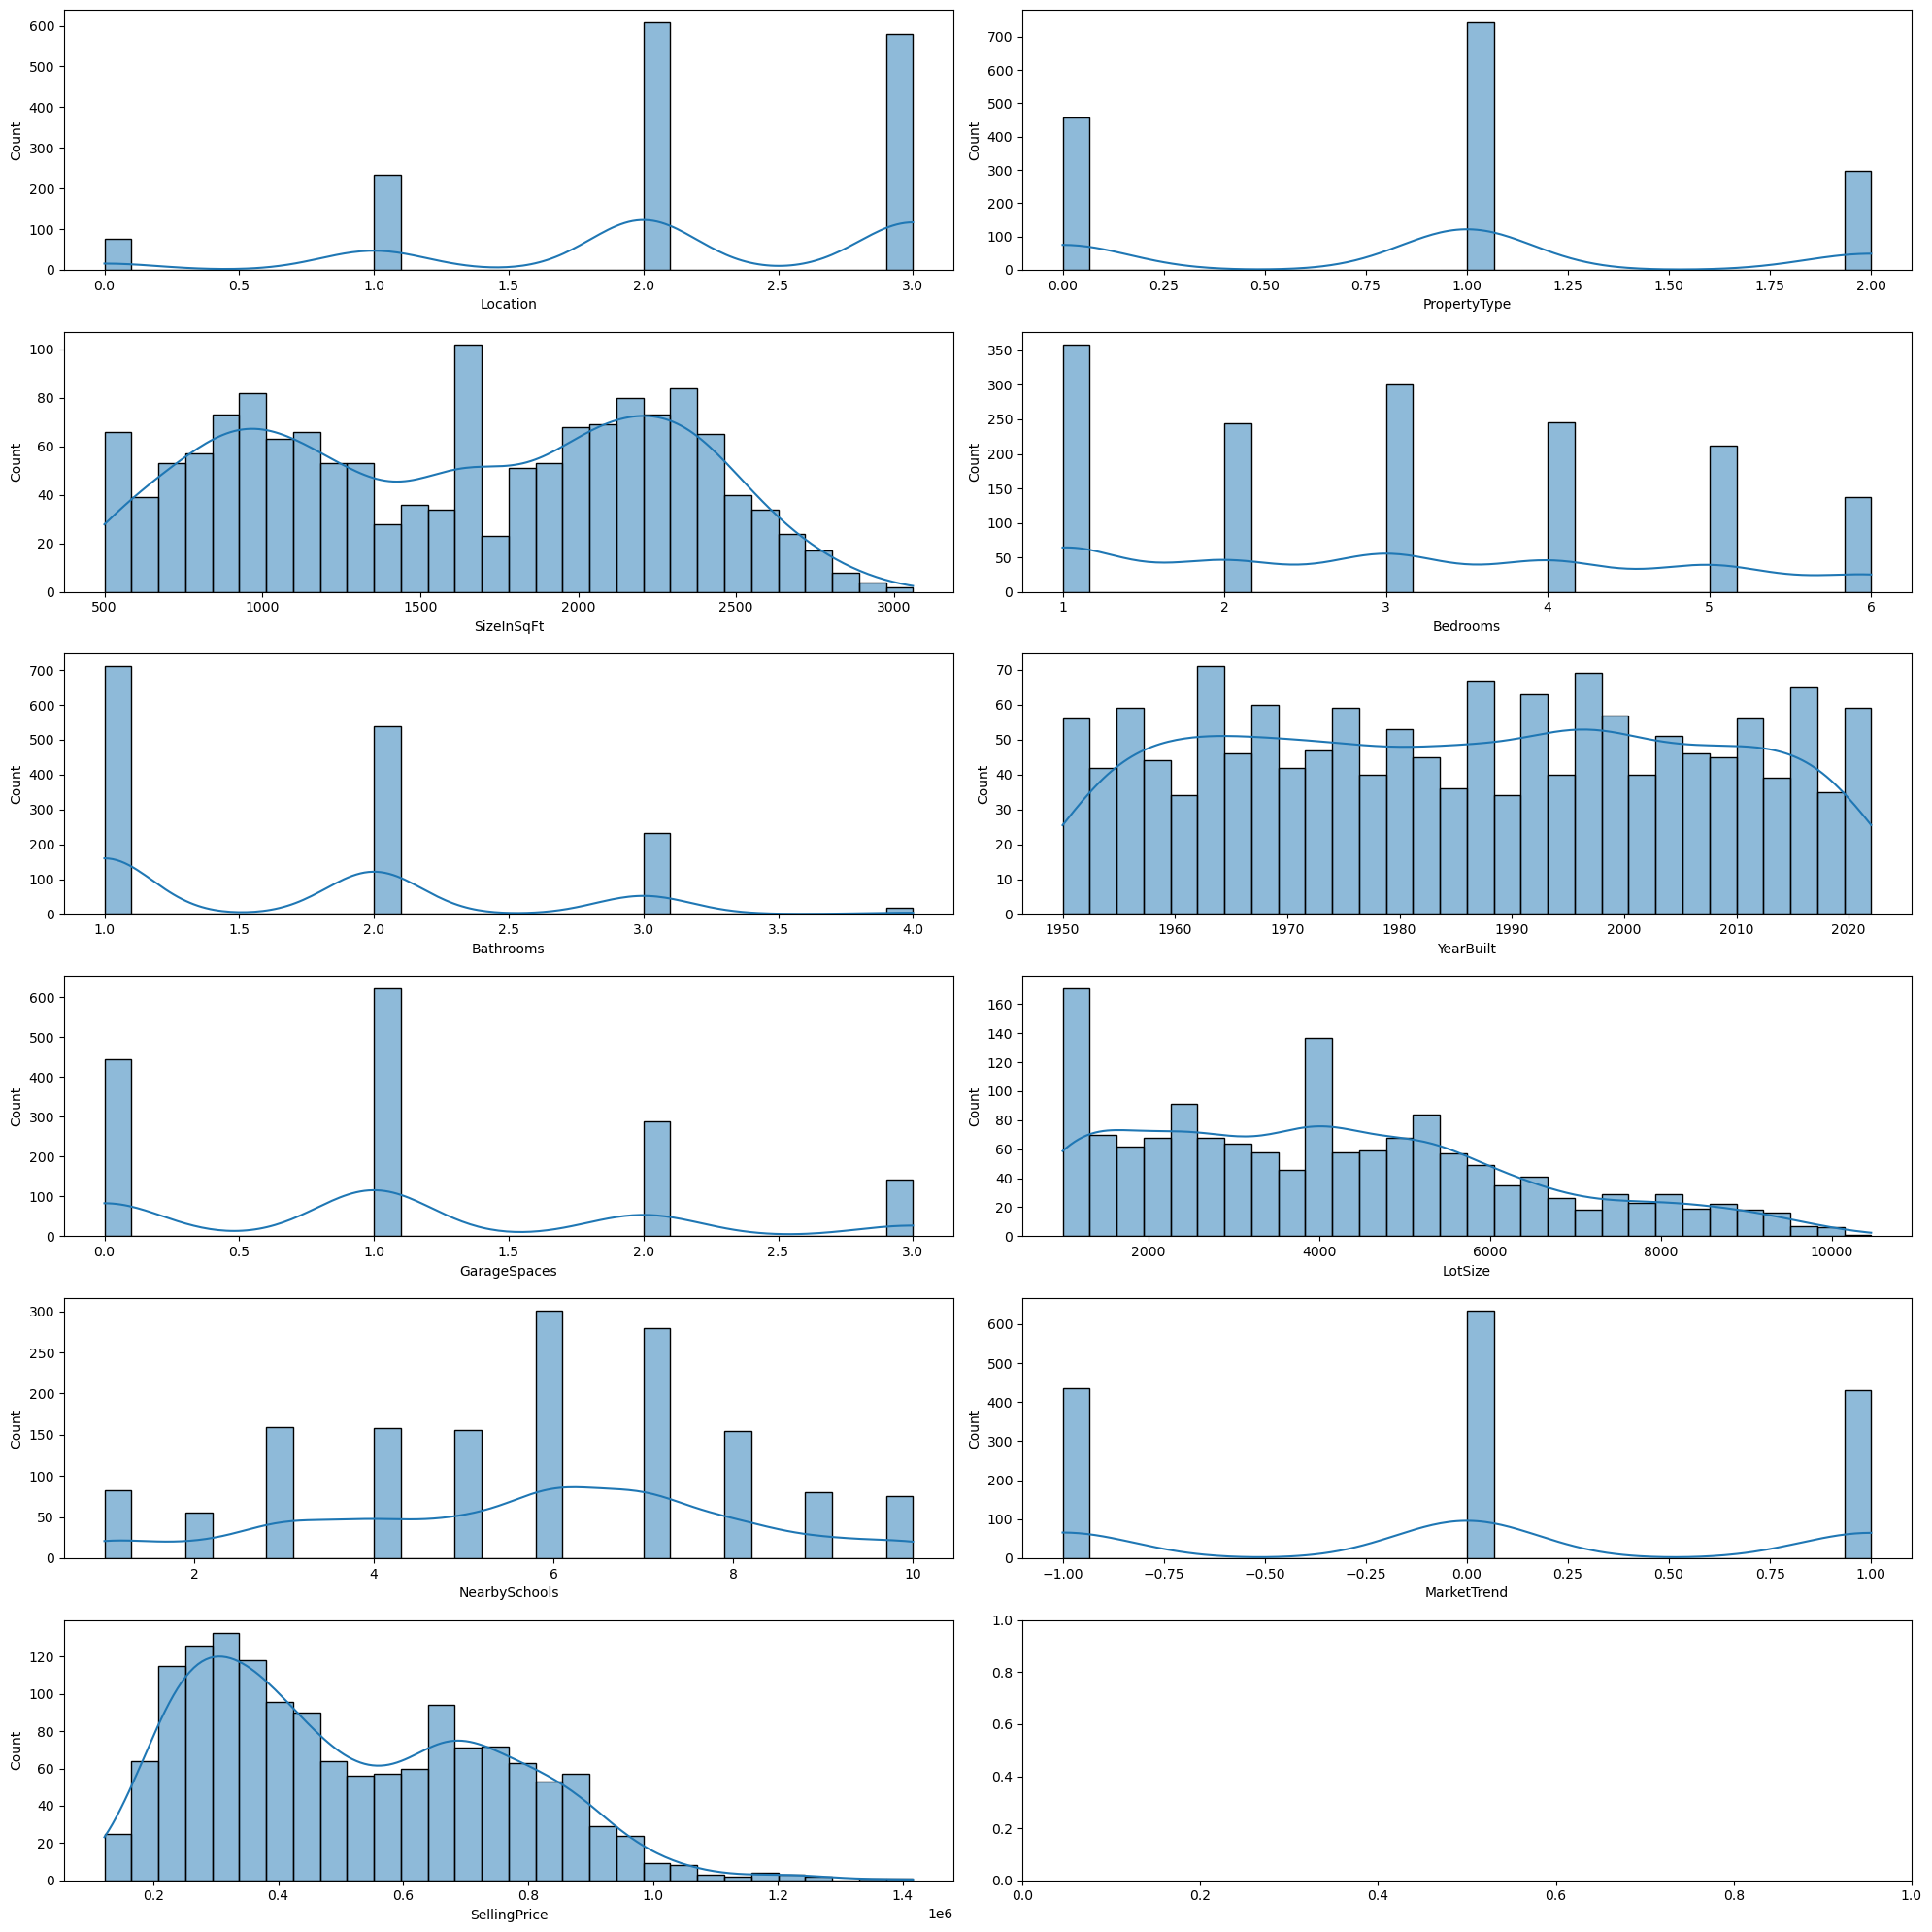

In [46]:
# Display plots, to determine the skewness/uniformity of data(variables).

fig, ax = plt.subplots (6,2, figsize=(20,20))
ax = ax.flatten()

for idx, col in enumerate(data):
    sns.histplot(data[col], kde=True, bins=30, ax=ax[idx])

plt.tight_layout()
plt.show()

In [47]:
# MinMaxScaler for uniform distribution, StandardScaler for slightly skewed, RobustScaler for heavily skewed 

In [48]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

# Scale numerical columns
scaler = MinMaxScaler()
scaled_cols = ['SizeInSqFt', 'Bedrooms', 'Bathrooms', 'YearBuilt', 'GarageSpaces', 'LotSize', 'NearbySchools']
data[scaled_cols] = scaler.fit_transform(data[scaled_cols])

In [49]:
# Display scaled data
data.describe()

,Location,PropertyType,SizeInSqFt,Bedrooms,Bathrooms,YearBuilt,GarageSpaces,LotSize,NearbySchools,MarketTrend,SellingPrice
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1.500000e+03
mean,2.128000,0.892000,0.434427,0.415733,0.234444,0.498861,0.361778,0.329702,0.521704,-0.003333,5.112892e+05
std,0.855631,0.701901,0.252884,0.326655,0.255251,0.290021,0.309832,0.238558,0.254264,0.759632,2.393133e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,1.217560e+05
25%,2.000000,0.000000,0.201465,0.200000,0.000000,0.250000,0.000000,0.134833,0.333333,-1.000000,3.075755e+05
50%,2.000000,1.000000,0.444922,0.400000,0.333333,0.500000,0.333333,0.311800,0.555556,0.000000,4.583810e+05
75%,3.000000,1.000000,0.656250,0.600000,0.333333,0.750000,0.666667,0.478933,0.666667,1.000000,7.017140e+05
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.416213e+06


### 1.6 Define Features and Target

In [50]:
# Define features (X) and target variable (y)
X = data.drop('SellingPrice', axis=1)
y = data['SellingPrice']

# 2. Data Splitting
Split the data into training and testing sets (80% training, 20% testing).

In [51]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Model Selection and Training
Start with a basic linear regression model.

### 3.1 Train Linear Regression Model

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
# Initialize and train the model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [54]:
# Coefficients and intercept
print("Coefficients:", lr.coef_)
print("Intercept:", lr.intercept_)

Coefficients: [ -14601.62045072   21643.41507943  548093.22995907  164040.26104474
   65965.42204859   21140.17025878   40574.4050213  -401928.68520769
   49468.94582127   11909.85146471]
Intercept: 280311.03478425945


***Result Interpretation:***

- **Intercept (280,311.01):**
    - The intercept represents the predicted base selling price of a property when all features (predictors) are zero.
    - In this case, it serves as the baseline price before accounting for factors like size, location, and amenities etc.
    - Since having "zero" for features like SizeInSqFt or Bedrooms is unrealistic, the intercept mainly provides a starting value for the model predictions.
 

- **Coefficients:**
Each coefficient represents the change in the predicted selling price for a one-unit increase in the respective feature, holding all other features constant.

***Feature	Coefficient	Interpretation***
| **Feature**       | **Coefficient**   | **Interpretation**                                                                                                                                      |
|-------------------|-------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Location**      | -14,601.62        | A one-unit increase in `Location` results in a decrease of \$14,601.62 in the predicted selling price, indicating that certain locations may reduce the price. |
| **PropertyType**  | 21,643.42         | A one-unit increase in `PropertyType` corresponds to an increase of \$21,643.42 in the selling price, suggesting that certain property types (e.g., Single Family) increase the price. |
| **SizeInSqFt**    | 548,093.23        | A one-unit increase in `SizeInSqFt` results in an increase of \$548,093.23 in the predicted price, indicating a strong positive relationship between size and price. |
| **Bedrooms**      | 164,040.26        | A one-bedroom increase results in an increase of \$164,040.26 in price, showing that more bedrooms contribute to a higher property value. |
| **Bathrooms**     | 65,965.42         | Each additional bathroom increases the predicted price by \$65,965.42, suggesting that more bathrooms add value to the property. |
| **YearBuilt**     | 21,140.17         | A one-year increase in `YearBuilt` leads to an increase of \$21,140.17 in price, indicating that newer homes tend to have a higher price. |
| **GarageSpaces**  | 40,574.41         | Each additional garage space increases the price by \$40,574.41, reflecting the value added by more garage spaces. |
| **LotSize**       | -401,928.69       | A one-unit increase in `LotSize` results in a decrease of \$401,928.69 in price, possibly indicating that larger lot sizes in certain areas reduce the property value. |
| **NearbySchools** | 49,468.95         | A one-unit increase in `NearbySchools` leads to an increase of \$49,468.95 in the predicted price, indicating that properties near highly rated schools are valued higher. |
| **MarketTrend**   | 11,909.85         | A one-unit increase in `MarketTrend` corresponds to an increase of \$11,909.85 in price, suggesting that properties in areas with improving market trends are valued higher. |

                       

- **Insights:**
    1. High Impact Features on Property Price:
        - SizeInSqFt and Bedrooms have the highest coefficients, suggesting that the size of the property and the number of bedrooms are crucial factors in determining the property’s selling price. Larger properties with more bedrooms are significantly more valuable.

    2. Positive Correlation with Price:

        - Features such as PropertyType, Bathrooms, YearBuilt, GarageSpaces, NearbySchools, and MarketTrend all show positive coefficients, meaning that increases in these factors generally lead to higher property prices. For example, being closer to good schools or having more bathrooms or garage spaces tends to increase the value of a property.

    3. Negative Impact of Certain Features:

        - Location and LotSize have negative coefficients, meaning that properties in certain locations (perhaps less desirable areas) or with larger lot sizes may have a reduced selling price. Larger lot sizes, for instance, might not always translate to higher value, possibly due to lower demand for large land areas or specific geographic areas.

    4. Significance of Market and Location:

        - MarketTrend and Location both show how external factors influence the price. A better market trend increases property value, while a less desirable location reduces it.

    5. Subtle Influence of YearBuilt:

        - The YearBuilt feature also contributes positively, but with a relatively smaller impact compared to others like size or bedrooms. Newer properties tend to be worth more, but this relationship is not as pronounced as other variables.

### 3.2 Predict on the Test Set

In [55]:
# Predict selling prices on the test set
y_pred = lr.predict(X_test)

# 4. Model Evaluation

### 4.1 Metrics for Evaluation
Evaluate the model using common regression metrics:
- Mean Absolute Error (MAE)
- Root Mean Squared Error (RMSE)
- R² Score

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)


Mean Absolute Error (MAE): 67620.67440010018
Root Mean Squared Error (RMSE): 90705.03888682564
R² Score: 0.8673454227156006


### 4.2 Residual Analysis
Analyze residuals to assess the model's performance.


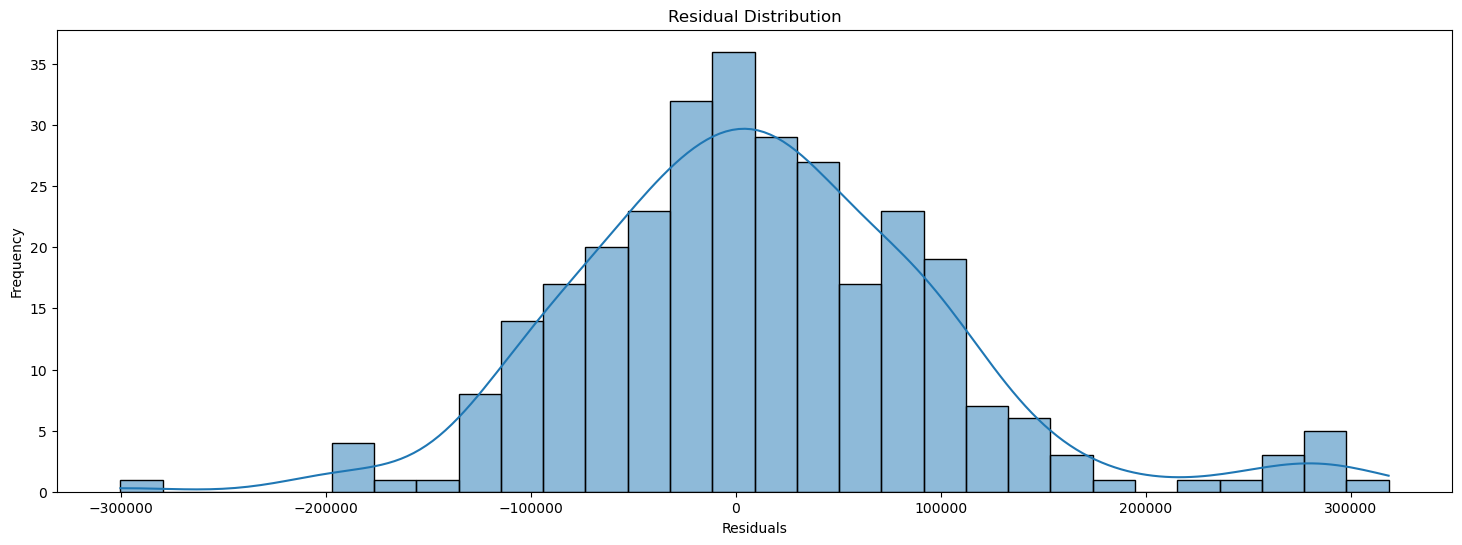

In [57]:
# Plot residuals
residuals = y_test - y_pred
plt.figure(figsize=(18, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


***Insights***:

The residuals (difference between actual and predicted prices) form a normal distribution:
This indicates that the model's errors are evenly distributed, without significant bias (e.g., overestimating or underestimating prices consistently).

# 5. Business Insights

### 5.1 Feature Importance
Feature importance can be interpreted using coefficients. The below is in order of importance to our prediction

In [58]:
# Create a DataFrame of feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_
}).sort_values(by='Coefficient', ascending=False)

In [59]:
feature_importance

,Feature,Coefficient
2,SizeInSqFt,548093.229959
3,Bedrooms,164040.261045
4,Bathrooms,65965.422049
8,NearbySchools,49468.945821
6,GarageSpaces,40574.405021
1,PropertyType,21643.415079
5,YearBuilt,21140.170259
9,MarketTrend,11909.851465
0,Location,-14601.620451
7,LotSize,-401928.685208


### 5.2 Summary of overal Insights
- Larger properties (SizeInSqFt) have the highest positive impact on house prices.
- The number of bedrooms(Bedrooms) and bathrooms(Bathrooms) significantly increase prices.
- High-rated schools (NearbySchools) are a key driver of pricing in family-friendly neighborhoods.